In [1]:
#import datas

import pandas as pd
import numpy as np
df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#print(df)
headers = list(df.columns)

In [2]:
#select a subset of columns
# df = pd.DataFrame(df, columns=['Source Port', 'Source Port', 'Destination IP', 'Destination Port', 'Label'])
# print(df.head())

In [3]:
headers = headers[7:]
headers = np.delete(headers, [13, 14, -1], 0)
X = df.iloc[:, 7:-1].values
y = df.iloc[:, -1].values
X = np.delete(X, [13, 14], 1)
# print(X)
# print(y[0])

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X=X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [5]:
# print(np.all(np.isfinite(X))) #and gets False
# for i in range(X.shape[0]):
#     for j in range(X.shape[1]): 
#         if not np.isfinite(X[i][j]):
#             print(i, j, X[i][j])
# np.isfinite(X).all()
# np.argwhere(np.isnan(X))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
classifier = SelectFromModel(RandomForestClassifier(n_estimators = 10, criterion = 'entropy'))
classifier.fit(X_train, y_train)
boolfeature = classifier.get_support()

In [9]:
selected_feat= headers[(classifier.get_support())]
print(selected_feat)
print(len(selected_feat))

[' Flow Duration' ' Total Fwd Packets' 'Total Length of Fwd Packets'
 ' Fwd Packet Length Max' ' Fwd Packet Length Mean'
 ' Fwd Packet Length Std' ' Bwd Packet Length Mean'
 ' Bwd Packet Length Std' ' Fwd IAT Mean' ' Fwd IAT Max'
 ' Fwd Header Length' ' Packet Length Mean' ' Average Packet Size'
 ' Avg Fwd Segment Size' 'Subflow Fwd Packets' ' Subflow Fwd Bytes'
 ' act_data_pkt_fwd']
17


In [10]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

Feature: 0, Score: 0.00033
Feature: 1, Score: 0.04418
Feature: 2, Score: 0.00110
Feature: 3, Score: 0.03573
Feature: 4, Score: 0.00186
Feature: 5, Score: 0.00241
Feature: 6, Score: 0.00396
Feature: 7, Score: 0.15380
Feature: 8, Score: 0.03332
Feature: 9, Score: 0.00008
Feature: 10, Score: 0.03984
Feature: 11, Score: 0.00020
Feature: 12, Score: 0.00226
Feature: 13, Score: 0.00033
Feature: 14, Score: 0.00029
Feature: 15, Score: 0.01458
Feature: 16, Score: 0.00070
Feature: 17, Score: 0.03550
Feature: 18, Score: 0.00416
Feature: 19, Score: 0.09219
Feature: 20, Score: 0.00293
Feature: 21, Score: 0.00019
Feature: 22, Score: 0.02263
Feature: 23, Score: 0.00007
Feature: 24, Score: 0.01843
Feature: 25, Score: 0.00025
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00064
Feature: 32, Score: 0.00155
Feature: 33, Score: 0.00085
Feature: 34, Score: 0.02713
Feature: 35, Score: 0.00012
Fe

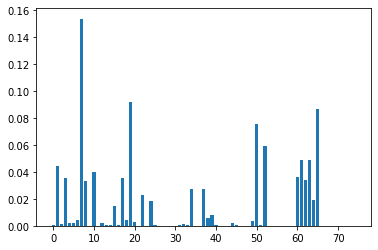

In [11]:
# summarize feature importance
import matplotlib.pyplot as plt
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [12]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['BENIGN' 'BENIGN']
 ['BENIGN' 'BENIGN']
 ['BENIGN' 'BENIGN']
 ...
 ['BENIGN' 'BENIGN']
 ['BENIGN' 'BENIGN']
 ['BENIGN' 'BENIGN']]


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19459     1]
 [   11 25678]]


0.9997342133823562

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9997342216479984

In [15]:
headers = np.delete(headers, ~boolfeature, 0)
X = np.delete(X, ~boolfeature, 1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
classifier = SelectFromModel(RandomForestClassifier(n_estimators = 10, criterion = 'entropy'))
classifier.fit(X_train, y_train)
classifier.get_support()
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [17]:
selected_feat= headers[(classifier.get_support())]
print(selected_feat)
print(len(selected_feat))

[' Fwd Packet Length Max' ' Bwd Packet Length Std' ' Avg Fwd Segment Size'
 ' Subflow Fwd Bytes' ' act_data_pkt_fwd']
5


In [21]:
df = pd.read_csv('./Friday-23-02-2018_TrafficForML_CICFlowMeter.csv')
X = df.iloc[:, 7:-1].values
y = df.iloc[:, -1].values
X = np.delete(X, [13, 14], 1)
print(X)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X=X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
# print(cm)
accuracy_score(y, y_pred)
from sklearn.metrics import f1_score
f1_score(y, y_pred, average='weighted')

[[1.96900000e+03 6.48000000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e+02 5.00000000e+02 ... 2.37532420e+07
  7.55830060e+07 4.19908490e+07]
 [0.00000000e+00 5.00000000e+02 5.00000000e+02 ... 2.37532484e+07
  7.55830070e+07 4.19908410e+07]
 ...
 [9.80000000e+01 4.10000000e+01 4.10000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.65900000e+03 6.77000000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.38000000e+02 1.40000000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


ValueError: Input contains infinity or a value too large for dtype('float64').